<IPython.core.display.Javascript object>


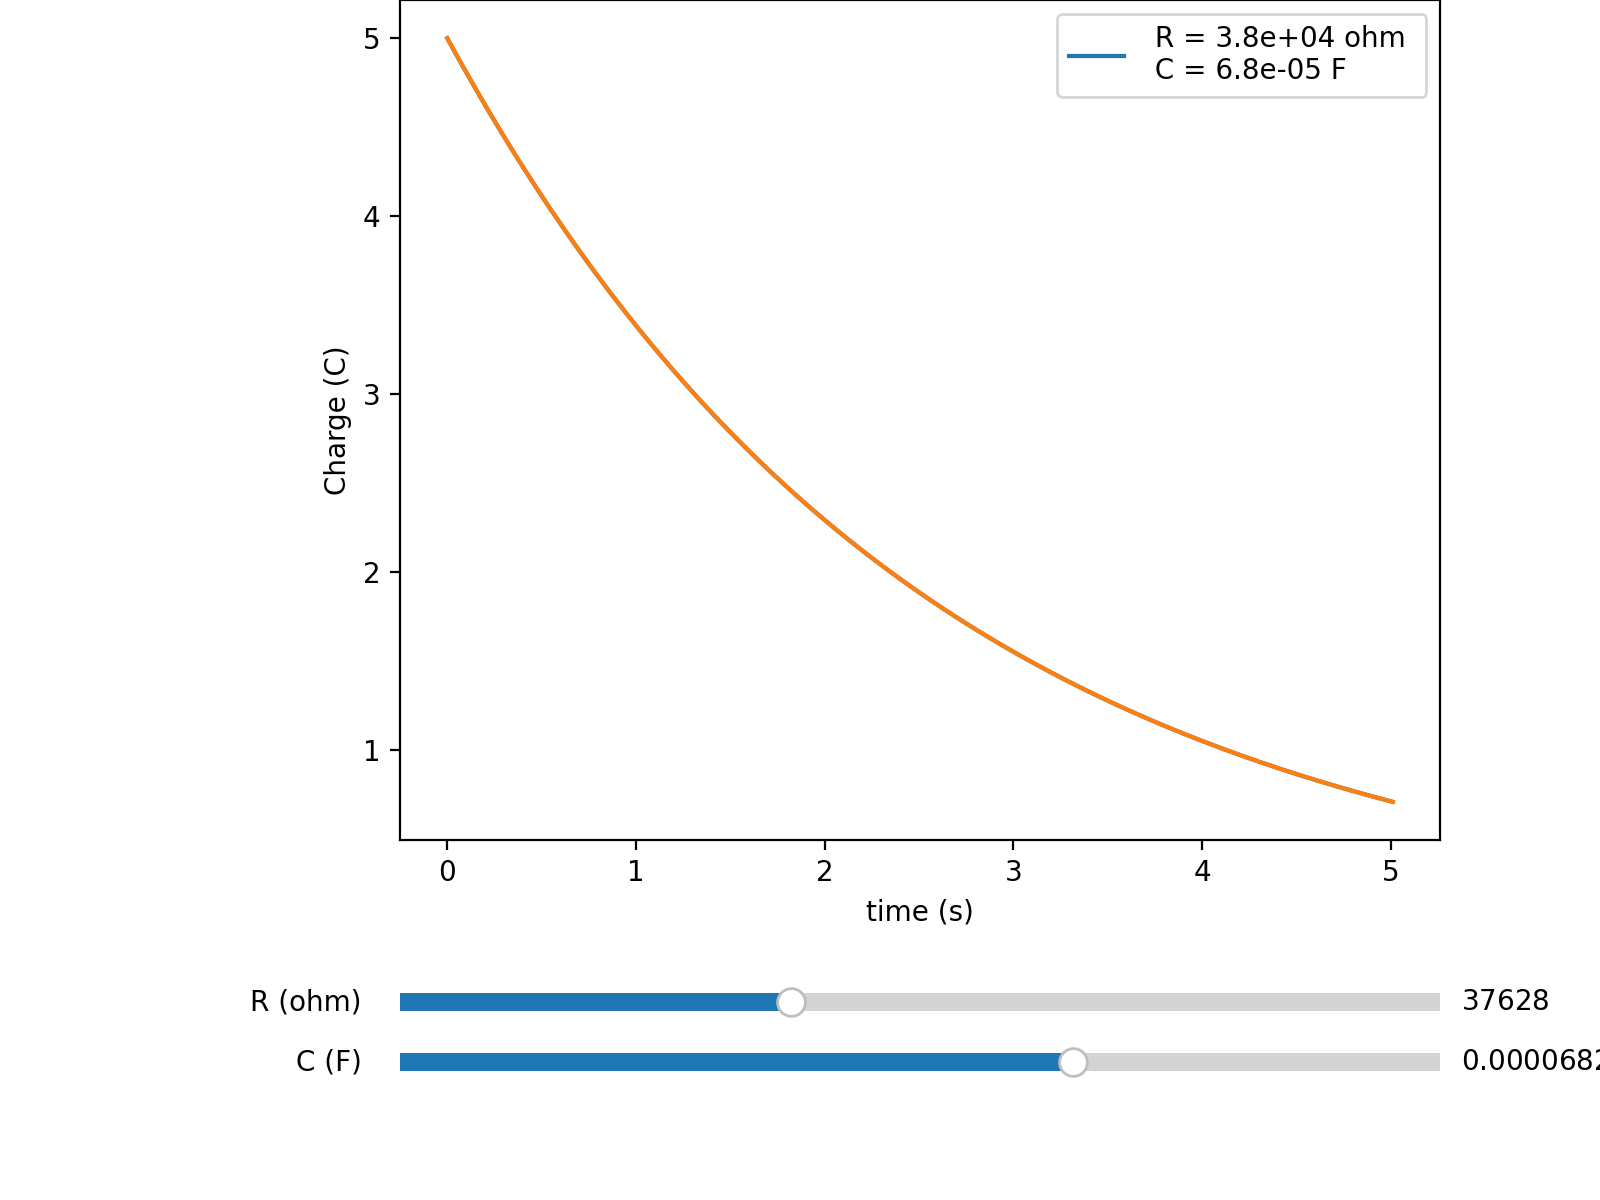

In [3]:
# Initial Value Problem
# Capacitor charging using Euler's method.

# Setup: we have a battery in series with
# a switch, a resistor, and a capacitor.

# Import libraries
%matplotlib notebook
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, interactive_output, fixed, FloatRangeSlider, IntSlider, HBox, Layout, Output, VBox

import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def RC_widget():
    # Create the graph region of size (width, height)
    fig, ax = plt.subplots(figsize = (8,6))

    # Make a plot with one figure

    plot1 = plt.subplot(1,1,1)

    # Adjust its position

    plot1.set_position([0.25, 0.30, 0.65, 0.7])

    # Create regions for the slider
    # The argument of axes is a list [lower left corner x coordinate, lower left y, width, height]. For example, left is 
    # the percentage of the distance between the left side axis and the border, of the total width
    r_ax = plt.axes([0.25, 0.15, 0.65, 0.03])
    c_ax = plt.axes([0.25, 0.1, 0.65, 0.03])

    # Make a Slider object for r from valmin to valmax inside axes r_ax
    # with valinit as initial value
    r_slider = Slider(r_ax,'R (ohm)  ', valmin = 0, valmax = 100e3, valinit = 100e3)  # resistance, in Ohm

    # Make a slider for c from X to Y in axes c_ax
    # with Z as initial value
    c_slider = Slider(c_ax,'C (F)  ',valmin = 10e-6,valmax = 10e-5,valinit = 10e-6) # capacitance, in Farad
    # Don't show the initial value
    r_slider.vline.set_visible(False)
    c_slider.vline.set_visible(False)

    # Optional clear plot and reset title function
    def plotconf():
        plot1.cla()
        plot1.set_xlabel('time (s)')
        plot1.set_ylabel('Charge (C)')
        plot1.set_title('Charge on positive plate')    
    
    # dq/dt equation
    def dq_dt(q,r,c,vb):
        result = -q/(r*c) + vb/r
        return(result)

    # Constants
    vb = 0 # battery emf, in Volt
    dt = 0.01


    def update(dummy):
    
        # clear plots  before each update
        #plot1.cla()

        # or clear plots, titles, labels function written by cica
        plotconf()

        # Use the  sliders value as r and c
        r = r_slider.val 
        c = c_slider.val 


        # Time
        ti = 0 # initial time, in seconds
        tf = 5 # final time, in seconds

        num_steps = int((1/dt)*(tf-ti))

        # Initial charge
        q = 5
        t = ti

        ts = [t]
        qs = [q]

        while t < tf:
            # Update values
            q = q + dt * dq_dt(q,r,c,vb) # step Euler-Cromer integration
            t += dt # increment time
            ts.append(t) # append time to list
            qs.append(q) # append charge to list
          

        # Plot all the values!
        #plot1.plot(ts,qs,label ='R = '+str(round(r,2))+ '\n C = '+str(c))#,c='g')
        new_line = '\n'
        plot1.plot(ts,qs,label = f" R = {r:.2g} ohm {new_line} C = {c:.2g} F")
        plot1.plot(ts,qs)
        plot1.legend()
    
    # Call update function when slider value is changed 
    r_slider.on_changed(update)
    c_slider.on_changed(update)

    # Run the applet on the initial state
    update(0)

    # Show plot
    plt.show()  

# RC_widget()  
